# Análise de dados com Pandas
## Configuração do ambiente:
1. Foi baixado as bibliotecas numpy, pandas, seaborn e matplotlib na máquina host
2. Foi baixado o arquivo referente à data de março de 2022 no site do INSS
3. Então, importamos as bibliotecas

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

## Lendo o arquivo .csv
Lemos o arquivo da pasta "./data/" usando a biblioteca do Pandas. Esta leitura nos gera um dataframe.
Para mostrar quais dados temos, basta mostrar as colunas do "data".

In [10]:
data = pd.read_csv("./data/data.csv", sep=";", encoding="ISO-8859-1")
data.columns

Index(['Competência concessão', 'Espécie', 'CID', 'Despacho', 'Dt Nascimento',
       'Sexo.', 'Clientela', 'Tipo de Cálculo', 'Mun Resid',
       'Vínculo dependentes', 'Forma Filiação', 'UF', 'Qt SM RMI'],
      dtype='object')

## Quais estados têm maioria no arquivo?
- Aqui fazemos uma análise para vermos quais estados possuem mais recebedores do INSS.
- Interpretamos então os dados, vendo que São Paulo lidera a pesquisa, seguido por DF e Minas Gerais.
- Os estados que menos recebem auxílios são Amapá, Roraima e Acre.
- Mas basta lembrar que estes são valores absoulutos, e não relativos, ou seja, faz sentido, afinal São Paulo é um o estado mais populoso do Brasil, enquanto Acre é um dos que menos possui população.

([<matplotlib.patches.Wedge at 0x127bbc5e0>,
 [Text(0.8843787190581281, 0.6541209989574593, 'São Paulo          '),
  Text(-0.10429565150557316, 1.095044481780091, 'Distrito Federal   '),
  Text(-0.8214388152038742, 0.7315998037701046, 'Minas Gerais       '),
  Text(-1.086757306224026, 0.1701721404011199, 'Bahia              '),
  Text(-1.0590565510201033, -0.2973200661600282, 'Rio Grande do Sul  '),
  Text(-0.8755752974765174, -0.665858767644392, 'Paraná             '),
  Text(-0.6165107323007032, -0.910996441792201, 'Rio de Janeiro     '),
  Text(-0.30230631658547896, -1.0576440284672912, 'Santa Catarina     '),
  Text(-0.024366195010231788, -1.0997300980425713, 'Ceará              '),
  Text(0.19446040911165463, -1.0826749970735114, 'Pernambuco         '),
  Text(0.3985944578667931, -1.0252426337983986, 'Goiás              '),
  Text(0.5602582909602541, -0.9466312098226508, 'Pará               '),
  Text(0.6819076526049813, -0.8631349566080407, 'Maranhão           '),
  Text(0.78317

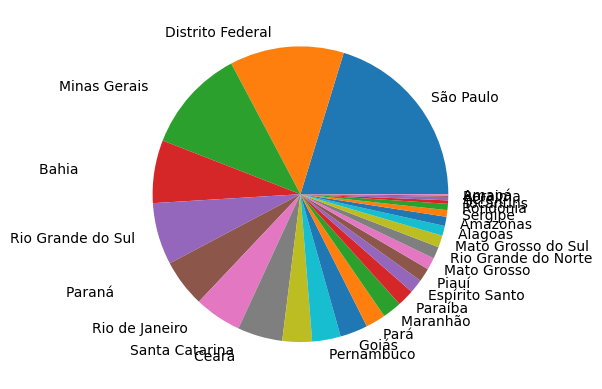

In [11]:

uf_sum = data["UF"].value_counts().sum()

uf_strings = data["UF"].value_counts().index

plt.pie(data["UF"].value_counts(), labels=uf_strings)

## Análise sobre recebimento de pensão por morte via acidente de trabalho
- Aqui foi feita uma análise para saber se são homens ou mulheres que mais recebem pensão por morte via acidente de trabalho.
- O resultado nos mostra uma diferença expressiva de mulheres que recebem mais auxílio nesta área do que homens

<AxesSubplot: >

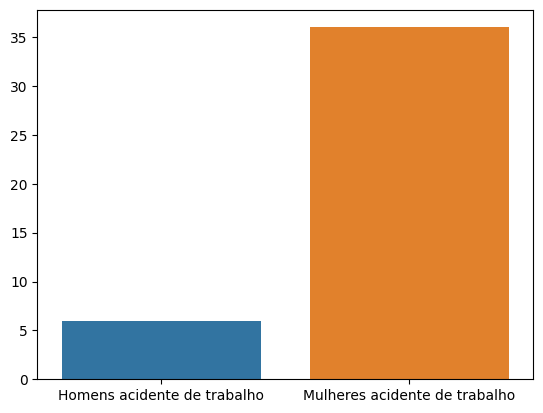

In [12]:
sex_string = data.loc[data["Sexo."] == 'Masculino    ']
sex_count = sex_string.loc[data["Espécie"] == 'Pensão por Morte Acidente do Trabalho        '].value_counts().sum()

sex_string = data.loc[data["Sexo."] == 'Feminino     ']
fem_count = sex_string.loc[data["Espécie"] == 'Pensão por Morte Acidente do Trabalho        '].value_counts().sum()

sns.barplot(x=["Homens acidente de trabalho", "Mulheres acidente de trabalho"], y=[sex_count, fem_count])

## Quantidade de auxílio maternidade recebido
- Análise para ver a diferença entre o recebimento de auxílio maternidade entre homens e mulheres
- Foi utilizado o Seaborn para plotar o gráfico
- O resultado é expressivamente maior para mulheres. Ou seja, mulheres recebem muito mais auxílio maternidade do que homens.

40


<AxesSubplot: >

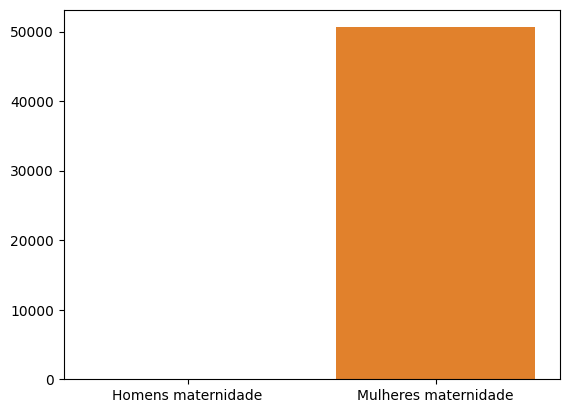

In [16]:
sex_string = data.loc[data["Sexo."] == 'Masculino    ']
sex_count = sex_string.loc[data["Espécie"] == 'Auxílio Salario Maternidade                  '].value_counts().sum()

sex_string = data.loc[data["Sexo."] == 'Feminino     ']
fem_count = sex_string.loc[data["Espécie"] == 'Auxílio Salario Maternidade                  '].value_counts().sum()

print(sex_count)
sns.barplot(x=["Homens maternidade", "Mulheres maternidade"], y=[sex_count, fem_count])

## Desvio padrão da quantidade de salários mínimos recebidos
  - Análise usando NumPy para ver qual é o desvio padrão na quantidade de salários mínimos recebidos pelo INSS.
  - Vemos que o desvio padrão é de 0.74 salários minímos.

In [15]:

dataa = data["Qt SM RMI"]
dataaa = np.array(dataa)
new_data = []
for i, d in enumerate(dataaa):
    v = float(d.replace(",", "."))
    new_data.append(v)

np.std(new_data)

0.739616005867102